# Introduction
As an analyst at a big online store and together with the marketing department, a compiled  list of hypotheses has been made  that may help boost revenue.
These hypotheses need to br prioritized ,we need to launch an A/B test, and analyze the results.

## Data Preparation
1.Download the data and prepare it for analysis

2.Store the data on visits, orders, and expenses in variables.

3.Optimize the data for analysis.Make sure each column contains the correct data type.

In [63]:
# Loading all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import scipy.stats as stats
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.set_option('max_colwidth', 0)

In [64]:
# Loading hypotheses_us  
try:
    hypotheses=pd.read_csv('hypotheses_us.csv',sep=';')
except :
    hypotheses=pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
    
# Loading orders_log_us  
try:
    orders=pd.read_csv('orders_us.csv')
except :
    orders=pd.read_csv('/datasets/orders_us.csv')

# Loading costs_us  
try:
    visits=pd.read_csv('visits_us.csv')
except :
    visits=pd.read_csv('/datasets/visits_us.csv')

**Optimizing data**

In [65]:
#hypotheses_us
hypotheses.info(memory_usage='deep')
hypotheses.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [66]:
#cheking for nans
hypotheses.isna().sum()
orders.isna().sum()
visits.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date      0
group     0
visits    0
dtype: int64

In [67]:
#orders_us
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 179.0 KB


In [68]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# orders['group'] -> object to category
#orders['group'] = orders['group'].astype('category')
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 110.0 KB


In [69]:
#visits_us
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.4 KB


In [70]:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# visits['group'] -> object to category
#visits['group'] = visits['group'].astype('category')
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.8 KB


In [71]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Improving Column Format**

In [72]:
hypotheses.columns = hypotheses.columns.str.lower()

In [73]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [74]:
orders.columns=['transaction_id','visitor_id', 'date', 'revenue', 'group']

In [75]:
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [76]:
visits.columns

Index(['date', 'group', 'visits'], dtype='object')

**cheking if there are users in group A and group B**

In [77]:
group_a =  orders[orders['group']=='A']
group_b =  orders[orders['group']=='B']

#merging both
users_in_a_and_b =  group_a.merge(group_b,on='visitor_id',how='inner')

users_in_a_and_b.shape[0]

183

So we have 183 users in both groups, we need to filter  the orders data set correctly

In [78]:
all_orders = orders.copy()
orders =  orders[~orders['visitor_id'].isin(users_in_a_and_b['visitor_id'])]
orders.info()
all_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   float64       
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-

In [79]:
visits.columns,visits.head(2)

(Index(['date', 'group', 'visits'], dtype='object'),         date group  visits
 0 2019-08-01  A     719   
 1 2019-08-02  A     619   )

In [80]:
#checking visits table
visits.duplicated(keep=False).sum()
visits.info()

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<div class="alert alert-block alert-info">
<b>I found out that there were users in 'orders' that were on group A and B at the same time. Therefore I flitered the 'orders' table by removing these dual agents of caos</b> 
    <a class="tocSkip"></a>
</div>

# Part 1. Prioritizing Hypotheses
The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.
The task is to:

 - Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
 - Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
 - Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

## Apply the ICE framework to prioritize hypotheses
 - ICE = Impact x confidence x Ease
 - ICE = (Impact x confidence) / Effort

In [81]:
hypotheses.loc[2,'hypothesis']
hypotheses

"Add product recommendation blocks to the store's site. This will increase conversion and average purchase size"

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [82]:
hypotheses['ICE'] = (hypotheses['impact'] *  hypotheses['confidence'])/hypotheses['effort']

In [83]:
hypotheses[['hypothesis','ICE']].sort_values('ICE',ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


## Apply the RICE framework to prioritize hypotheses
 - RICE =  (reach x impact x confidence)/ effort

In [84]:
hypotheses['RICE'] = (hypotheses['reach'] *hypotheses['impact'] *  hypotheses['confidence'])/hypotheses['effort']

In [85]:
hypotheses[['hypothesis','RICE']].sort_values('RICE',ascending=False).head()

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2


## Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

In [86]:
priority_ranking = hypotheses[['hypothesis','ICE','RICE']]
print('ICE priotization:')
priority_ranking.sort_values('ICE',ascending=False)
print('RICE priotization:')
priority_ranking.sort_values('RICE',ascending=False)

ICE priotization:


,hypothesis,ICE,RICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000,112.0
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000,40.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000,56.0
1,Launch your own delivery service. This will shorten delivery time,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,1.333333,4.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,1.000000,3.0


RICE priotization:


,hypothesis,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,1.000000,3.0


*****While ICE ranks hypotheses 8,0,7 and 6 on top RICE ranks 7,2,0 and 6. Hyphothesis 7 has the higher reach score therefore its no wonder that it would be the priority by RICE*****

************************************
************************************
# Part 2. A/B Test Analysis 
 - You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.

## 1. Graph cumulative revenue by group. Make conclusions and conjectures

In [87]:
# building an array with unique paired date-group values 
datesGroups = orders[['date','group']].drop_duplicates()

In [88]:
#orders aggregated
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                     orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique,
                                                                                                          'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [89]:
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'],
                                                                       visits['group'] == x['group'])].agg({'date' : 'max',
                                                                                                            'group' : 'max',
                                                                                                            'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [90]:
# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [91]:
cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']].head(10)

,date,revenue,orders
0,2019-08-01,2266.6,23
2,2019-08-02,3734.9,42
4,2019-08-03,5550.1,66
6,2019-08-04,6225.6,77
8,2019-08-05,7623.6,99
10,2019-08-06,8292.0,114
12,2019-08-07,10234.0,130
14,2019-08-08,11638.8,144
16,2019-08-09,13734.0,155
18,2019-08-10,16121.5,170


C:\Users\Thor 3\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Thor 3\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Thor 3\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


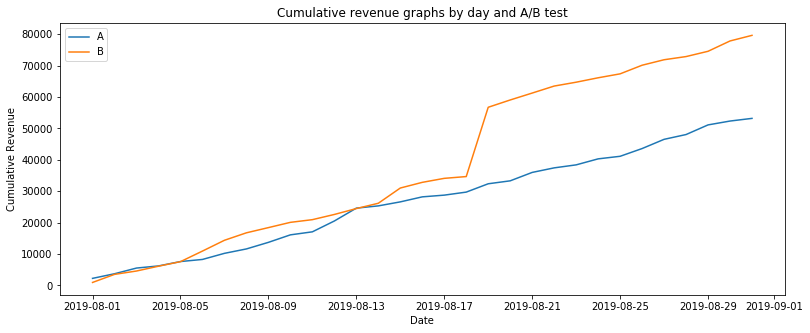

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 5))
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Cumulative revenue graphs by day and A/B test')
plt.ylabel('Cumulative Revenue')
plt.xlabel('Date')
plt.legend()
plt.show();

**Conclusion and Conjecture:**
  - Revenue rises throuout the test in a steady way
  - A spike in group B is an indication of either a very expensive orders a surge in the number of orders
  - We'll have to do some oulier analysis

<div class="alert alert-block alert-success">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good
    
</div>

## 2. Graph cumulative average order size by group. 
Make conclusions and conjectures

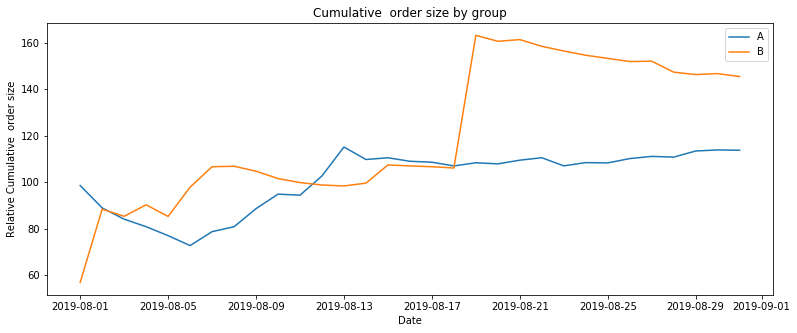

In [93]:
plt.figure(figsize=(13, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Cumulative  order size by group')
plt.ylabel('Relative Cumulative  order size')
plt.xlabel('Date')
plt.legend()
plt.show();

**Conclusion and Conjecture:**
  - By the end of the test both groups seem to stabilize . B running hiher than A but sliding in a almost paralel way
  - The sudden jump in group B might indicate to large, expensive orders

## 3. Graph the relative difference in cumulative average order size for group B compared with group A. 
Make conclusions and conjectures.

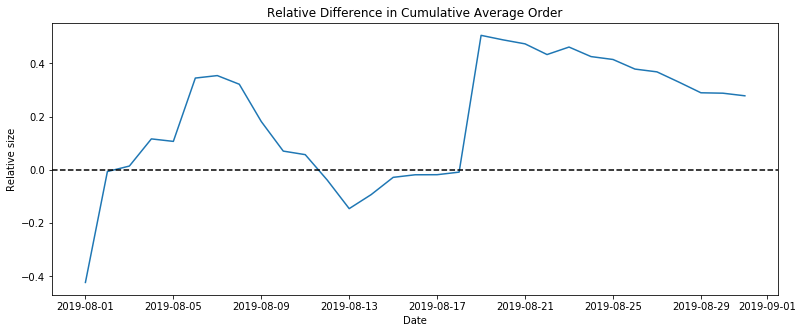

In [94]:
plt.figure(figsize=(13, 5))
plt.title('Relative Difference in Cumulative Average Order')
plt.ylabel('Relative size')
plt.xlabel('Date')
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--');

**Conclusion and Conjecture:**
  - The sudden upwards movement shows that that there are indeed some big orders and ouliers in Group B
  - B starts very low in relation to A but then it moves up very quickly, we see that A surpases B for segment of time but then we see the sudden spike in B. This is when the outliers took place

## 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference.
Draw conclusions and make conjectures.

In [95]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,74576.7,17708
58,2019-08-30,A,460,437,52363.7,18037
59,2019-08-30,B,531,511,77863.5,18198
60,2019-08-31,A,468,445,53212.0,18736


In [96]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

C:\Users\Thor 3\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Thor 3\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Thor 3\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


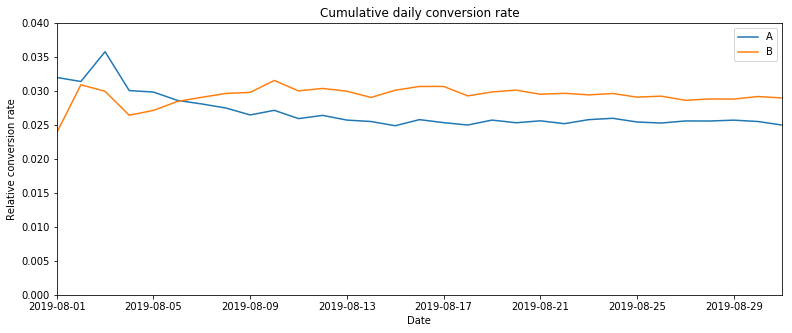

In [97]:
# plotting the graphs
plt.figure(figsize=(13, 5))
plt.title('Cumulative daily conversion rate')
plt.ylabel('Relative conversion rate')
plt.xlabel('Date')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([cumulativeData['date'].min(), cumulativeData['date'].max(), 0, 0.040])
plt.legend();
plt.show();

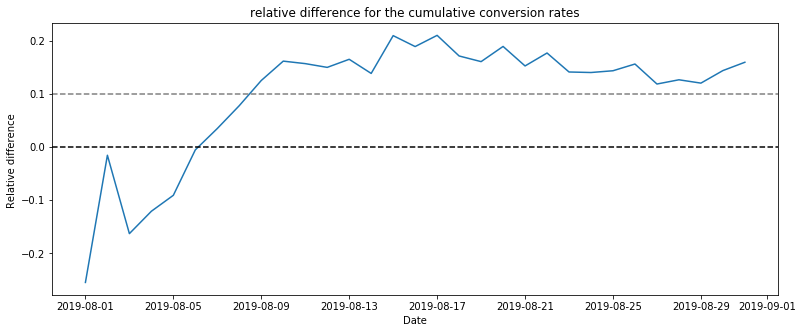

In [98]:
#Let's plot a relative difference graph for the cumulative conversion rates
plt.figure(figsize=(13, 5))
plt.title('relative difference for the cumulative conversion rates')
plt.ylabel('Relative difference ')
plt.xlabel('Date')

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=0.1, color='grey', linestyle='--');
plt.show();


**Conclusion and Conjecture:**
  - The groups  eventually fluctuate around the same value, but it took 5 days for the groups to stabilize.
  - Looking   at the Cumulative daily conversion rate : at the begining group A rises more than B but then they flipped places and B stays higher than A and both stay like that
  - Looking at the relative difference for the cumulative conversion rates we see that group B strugles at the begining and the fluctuates higher than A and we may say it stabilizes at aroun 0.1.

## 5. Plot a scatter chart of the number of orders per user. 
Make conclusions and conjectures.

In [99]:
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [100]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

ordersByUsers.columns = ['user_id', 'orders']

In [101]:
ordersByUsers.sort_values(by='orders', ascending=False).head(5)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


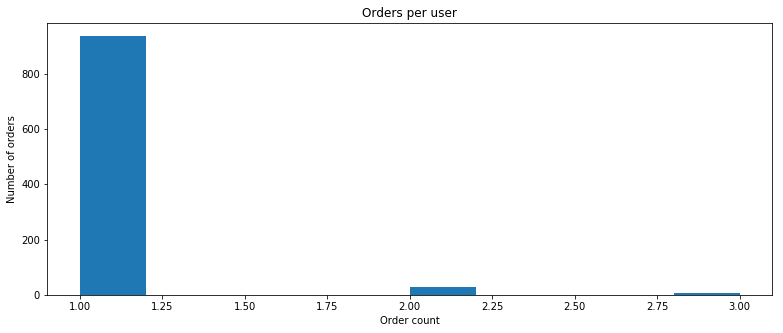

In [102]:
plt.figure(figsize=(13, 5))
plt.title('Orders per user')
plt.ylabel('Number of orders')
plt.xlabel('Order count')
plt.hist(ordersByUsers['orders'])
plt.show();

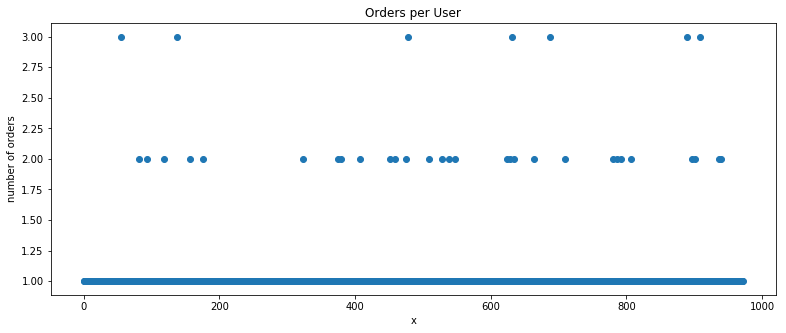

In [103]:
plt.figure(figsize=(13, 5))
plt.title('Orders per User')
plt.ylabel('number of orders')
plt.xlabel('x')
x_values = pd.Series(range(0, len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'])
plt.show();

**Conclusion and Conjecture:**
  - There are a lot of users with  more than 2 orders
  - And a few really outstanding users with more than 10 orders 
  - We could set the limit between 2 and 4 , let see what the percentiles tell us

## 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly

In [104]:
percentiles = np.percentile(ordersByUsers['orders'], [90, 95, 99])

In [105]:
print('No more than 10% of users placed more than {:.2f} orders,\nNo more than 5% placed more than {:.2f} orders,\nNo more than 1% of users placed more than {:.2f} orders'.format(percentiles[0],percentiles[1],percentiles[2]))

No more than 10% of users placed more than 1.00 orders,
No more than 5% placed more than 1.00 orders,
No more than 1% of users placed more than 2.00 orders


In [106]:
ordersByUsers.query('orders > 2').count()

user_id    7
orders     7
dtype: int64

**Conclusion and Conjecture:**
  - We can set the limit **at 2  orders** per user to be the upper limit for the number of orders and act as the filter for the anomalies

# 7. Plot a scatter chart of order prices.
Make conclusions and conjectures

In [107]:
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

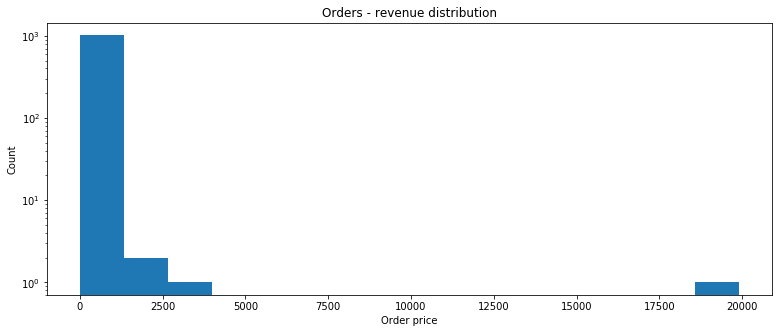

In [108]:
plt.figure(figsize=(13, 5))
plt.title('Orders - revenue distribution')
plt.ylabel('Count')
plt.xlabel('Order price')
plt.hist(orders['revenue'],bins=15,log=True)
plt.show();

 - Most of the orders are well below $2500
 - But we can not identify outliers here

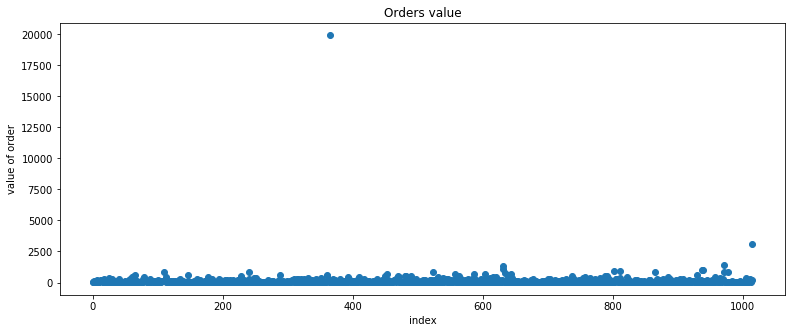

In [109]:
plt.figure(figsize=(13, 5))
plt.title('Orders value')
plt.ylabel('value of order')
plt.xlabel('index')
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.show();

In [110]:
series_df = pd.DataFrame(orders['revenue'])
series_df.sort_values(by='revenue',ascending=False).head()

,revenue
425,19920.4
1196,3120.1
1136,1425.8
744,1335.6
743,1050.0


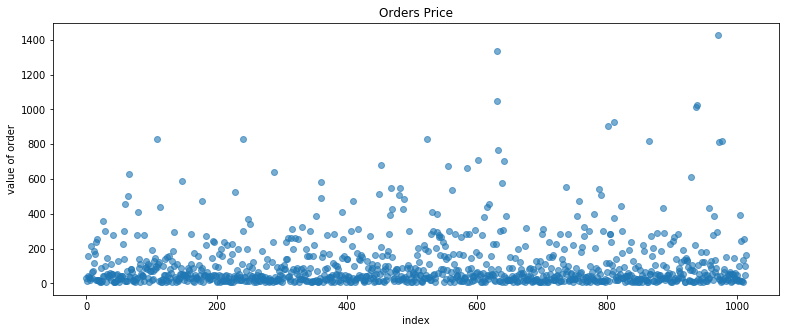

In [111]:
orders_revenue_filtered =  orders[orders['revenue']<2500]

plt.figure(figsize=(13, 5))
plt.title('Orders Price')
plt.ylabel('value of order')
plt.xlabel('index')
x_values2 = pd.Series(range(0, len(orders_revenue_filtered['revenue'])))
plt.scatter(x_values2, orders_revenue_filtered['revenue'],alpha=0.6)
plt.show();

**Conclusion and Conjecture:**
  - by looking at the revenue or order value distribution we cannot see the ouliers
  - but looking at the order value per users we identify 2 outliers one at \\$20,000 and another at \\$2,500
  - we can set the limit at around \\$2,500

## 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [112]:
percentiles = np.percentile(orders['revenue'], [90, 95, 99])

In [113]:
print('No more of 10% of orders are over {:.2f},\nNo more of 5% of orders are over {:.2f},\n1% of orders are over {:.2f}'.format(percentiles[0],percentiles[1],percentiles[2]))

No more of 10% of orders are over 280.80,
No more of 5% of orders are over 414.27,
1% of orders are over 830.30


In [114]:
orders.query('revenue > 435.54').count()

transaction_id    48
visitor_id        48
date              48
revenue           48
group             48
dtype: int64

**Conclusion and Conjecture:**
  - As we see that the order's revenue is mostly concentrated we can set the define the anomaly point at \\$435.54 to be the filter for the order price 

# 9. Find the statistical significance of the difference in conversion between the groups using the raw data. 
Make conclusions and conjectures.

In [115]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['user_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

alpha = 0.05
raw_conversion_results = stats.mannwhitneyu(sampleA, sampleB)[1]
raw_rel_diff_conversion = sampleB.mean()/sampleA.mean()-1

print('We use the Wilcoxon-Mann-Whitney test to compare two samples and conclude if the probability \nof the distributions of the two samples differ')

print('\nH0: Proportions of visits and orders are equal for both groups')
print('H1: Proportions of visits and orders are NOT equal for both groups')

print("\nthe Wilcoxon-Mann-Whitney criterion or p_value = {0:.3f}".format(raw_conversion_results))

if (raw_conversion_results < alpha):
    print("Null hypothesis rejected")
else:
    print("We can't reject the null hypothesis")   

print("The relative gain of group B is {0:.3f} or {0:.1%}".format(raw_rel_diff_conversion))

We use the Wilcoxon-Mann-Whitney test to compare two samples and conclude if the probability 
of the distributions of the two samples differ

H0: Proportions of visits and orders are equal for both groups
H1: Proportions of visits and orders are NOT equal for both groups

the Wilcoxon-Mann-Whitney criterion or p_value = 0.006
Null hypothesis rejected
The relative gain of group B is 0.160 or 16.0%


In [116]:
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

**Conclusion:**
 - With the raw data and knowing that we have siginificant outliers in the data we would suspect that that they influence the statistical difference in conversion between groups.
 - The statistical difference is such that we **reject** the hypothesis that the groups are the same

## 10. Find the statistical significance of the difference in average order size between the groups using the raw data. 
Make conclusions and conjectures.

In [117]:
orders.columns, visits.columns

(Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object'),
 Index(['date', 'group', 'visits'], dtype='object'))

In [118]:
sizeA = orders[orders['group']=='A']['revenue']
sizeB = orders[orders['group']=='B']['revenue']

In [119]:
sizeA = orders[orders['group']=='A']['revenue']
sizeB = orders[orders['group']=='B']['revenue']

alpha = 0.05
raw_order_size_results = stats.mannwhitneyu(sizeA, sizeB)[1]
raw_rel_avg_size = sizeB.mean()/sizeA.mean()-1

print('\nH0: Proportions of visits and orders are equal for both groups')
print('H1: Proportions of visits and orders are NOT equal for both groups')

print("\nthe Wilcoxon-Mann-Whitney criterion or p_value = {0:.3f}".format(raw_order_size_results))

if (raw_order_size_results < alpha):
    print("Null hypothesis rejected")
else:
    print("We can't reject the null hypothesis")  

print("The relative average order size of group B is {0:.3f} or {0:.1%}".format(raw_rel_avg_size))



H0: Proportions of visits and orders are equal for both groups
H1: Proportions of visits and orders are NOT equal for both groups

the Wilcoxon-Mann-Whitney criterion or p_value = 0.431
We can't reject the null hypothesis
The relative average order size of group B is 0.278 or 27.8%


**Conclusion:**
  - The statistical difference is such that we **can't** reject the hypothesis that the groups are the same.
  - The average order for group B is bigger than the one from group A by significant 27.8%

# 11. Find the statistical significance of the difference in conversion between the groups using the filtered data.
Make conclusions and conjectures.

Let's define anomalous users as those who place more than 2 orders or one order bigger than \\$435.54
That way we remove the 5\% of users with too many orders and also remove the 5\% of users with the most expensive orders

In [120]:
orders_lim = 2
price_lim = 435.54

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > orders_lim]['user_id'], ordersByUsersB[ordersByUsersB['orders'] > orders_lim]['user_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > price_lim]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print('There are {:} anomalous users in the data set '.format(abnormalUsers.shape[0]))

There are 55 anomalous users in the data set 


We'll prepare samples of the number of orders per user for each test group

In [121]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Applying the statistical Mann-Whitney criterion

In [122]:
flitered_conversion_results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
flitered_relative_conversion  = (sampleBFiltered.mean()/sampleAFiltered.mean()-1)
#raw_conversion_results , raw_rel_diff_conversion

print("The RAW data p_value is {0:.3f}, while for the Filtered data is {1:.3f}".format(raw_conversion_results,flitered_conversion_results))
print("The RAW data relative gain is {0:.3f}, while for the the Filtered is {1:.3f}".format(raw_rel_diff_conversion,flitered_relative_conversion))

The RAW data p_value is 0.006, while for the Filtered data is 0.005
The RAW data relative gain is 0.160, while for the the Filtered is 0.189


**Conclusion:**
  - Filtered data p_value = 0.005 which is smaller than 0.05 ==> We reject the Null hypotheses that the groups are equal
  - The change in  conversion results was very very small
  - Filtered relative gain is 18.9%  vs 16% from the raw one
  - Our test tell us that the groups do have differences between them. 


# 12. Find the statistical significance of the difference in average order size between the groups using the filtered data.
Make conclusions and conjectures.

In [123]:
#raw_order_size_results ,raw_rel_avg_size 

filtered_order_size_results = (stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A',
                          np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
                          orders[np.logical_and(orders['group']=='B',
                          np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1])

filtered_rel_order_size = (
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)


print("The RAW data avg order size p_value is {0:.3f}, while the Filtered is {1:.3f}".format(raw_order_size_results,filtered_order_size_results))
print("The RAW data avg order size relative conversion is {0:.3f}, while the Filtered is {1:.3f}".format(raw_rel_avg_size,filtered_rel_order_size))

The RAW data avg order size p_value is 0.431, while the Filtered is 0.399
The RAW data avg order size relative conversion is 0.278, while the Filtered is -0.022


**Conclusion:**
 - The filtered p_value is 0.399 which is bigger tha 0.05 and therefore we still cant't reject the null hypotheses that the groups have a significant statistical difference
 - The avg order size for the filtered group B is smaller that group A which means that group A leads here
 - By removing the anomalies we see how group A actually performs better even by a bit : 2%. 

# 13. Make a decision based on the test results. The possible decisions are:
1. Stop the test, consider one of the groups the leader. 
2. Stop the test, conclude that there is no difference between the groups.
3. Continue the test.

### **Summary:**
  - By Raw data:
      - Group B has a higher cumulative revenue , higher cumulative avg order size and much better conversion rate
      - While looking for anomalies I found out that users with more than 2 orders with a price of \$435.54 may be considered outliers
      - By testing the relative gain for conversion rate group B is 16\% higher than A
      - For the significance of the difference in avg order size the p_value is 0.431 (we cant reject the null hypotheses),therefore the we can't conclude that the order size differ between A and B
      - For the relative gain by avg order size group B is 27\% better than A
       
  - By Filtered Data:
     - I filtered our 55 users as outliers
     - By testing the relative gain for conversion rate group B is 18.9\% higher than A
     - For the significance of the difference in avg order size the p_value is 0.399 (we cant reject the null hypotheses),therefore **still**  can't conclude that the order size differ between A and B
     - For the relative gain by avg order size group B is 2\% worse than A
     
### **Conclusions:**
 - After removing the ouliers we see how group A's relative gain by avg order size is better than B's.
 - But we still can't conclude that A and B differ by avg order size(per the p_values)
 - The relative gain for conversion rate is much better for Group B in the Raw and Filtered data analysis.
 - If we consider the conversion rate to be important then we can consider this test a success since Group B performs much better 
  



In [124]:
print('done')

done
